In [1]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# load in the data
box_office_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
alt_title_names = pd.read_csv('title.akas.csv')
title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

In [3]:
new_name_basics = name_basics[['nconst', 'primary_name', 'primary_profession']]
new_basic_title = title_basics[['tconst', 'primary_title']]
new_crew_title = title_crew[['tconst', 'directors', 'writers']]
new_principals_title = title_principals[['tconst', 'nconst']]
new_ratings_title = title_ratings[['tconst', 'averagerating', 'numvotes']]
title_alias = alt_title_names[['title_id', 'title', 'region']]
title_alias.rename(columns={'title_id': 'tconst'})
title_alias.dropna(inplace=True)
to_remove = title_alias.loc[title_alias['region'] != 'US']
title_alias.drop(index=to_remove.index, inplace=True)
title_alias.head()

C:\Users\Gideon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gideon\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title_id,title,region
12,tt0369610,Jurassic World 3D,US
20,tt0369610,Jurassic World,US
21,tt0369610,Ebb Tide,US
28,tt0369610,Jurassic Park IV,US
37,tt0369610,Jurassic Park 4,US


In [4]:
movie_budgets.drop_duplicates(subset='movie', inplace=True)
movie_budgets['movie'].value_counts()

The Devil Wears Prada                   1
The Equalizer                           1
Spaceballs                              1
Despicable Me                           1
Jeepers Creepers                        1
                                       ..
Soldier                                 1
Wonder Woman                            1
Book Club                               1
The Adventures of Rocky & Bullwinkle    1
Dracula 2000                            1
Name: movie, Length: 5698, dtype: int64

In [5]:
money_values_to_integer(movie_budgets, 'production_budget')
money_values_to_integer(movie_budgets, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,NaN,$0,NaN
5778,79,"Apr 2, 1999",Following,NaN,"$48,482",NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,NaN,"$1,338",NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,NaN,$0,NaN


In [6]:
movie_budgets['profitability'] = movie_budgets['worldwide_gross']/movie_budgets['production_budget']
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,4.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,NaN,$0,NaN,NaN
5778,79,"Apr 2, 1999",Following,NaN,"$48,482",NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,NaN,"$1,338",NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,NaN,$0,NaN,NaN


In [30]:
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)
budgets_and_aliases = pd.merge(title_alias, movie_budgets, on='title')
budgets_and_aliases.head()

,title_id,title,region,id,release_date,production_budget,domestic_gross,worldwide_gross,profitability
0,tt0369610,Jurassic World,US,34,"Jun 12, 2015",215000000.0,"$652,270,625",1.648855e+09,7.669092
1,tt0401729,John Carter,US,14,"Mar 9, 2012",275000000.0,"$73,058,679",2.827781e+08,1.028284
2,tt1014759,Alice in Wonderland,US,51,"Mar 5, 2010",200000000.0,"$334,191,110",1.025491e+09,5.127456
3,tt1926979,Alice in Wonderland,US,51,"Mar 5, 2010",200000000.0,"$334,191,110",1.025491e+09,5.127456
4,tt2049386,Alice in Wonderland,US,51,"Mar 5, 2010",200000000.0,"$334,191,110",1.025491e+09,5.127456


In [8]:
movies_to_remove = budgets_and_aliases.loc[(budgets_and_aliases['worldwide_gross'] <= 10000000)]
movies_to_remove.head()
budgets_and_aliases.drop(index=movies_to_remove.index, inplace=True)

In [9]:
gross_and_titles = budgets_and_aliases[['title_id', 'title', 'worldwide_gross', 'profitability']]


In [10]:
gross_and_titles['title'].value_counts()

The Return          9
Home                8
Redemption          7
Trapped             6
Stuck               6
                   ..
Captain Phillips    1
Paraphobia          1
Larry Crowne        1
The Book Thief      1
Grudge Match        1
Name: title, Length: 1235, dtype: int64

In [11]:
gross_and_titles.drop_duplicates(subset='title', inplace=True)
gross_and_titles['title'].value_counts()

C:\Users\Gideon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Wolf                            1
Independence Day: Resurgence    1
Daisy Winters                   1
Turbo                           1
Icarus                          1
                               ..
The Last Airbender              1
Cloud Atlas                     1
Endless Love                    1
The Ridges                      1
The Gambler                     1
Name: title, Length: 1235, dtype: int64

In [12]:
new_principals_title.rename(columns={'tconst': 'title_id'}, inplace=True)
new_principals_title.dropna(inplace=True)
new_principals_title.groupby(by='title_id').head()

C:\Users\Gideon\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Gideon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title_id,nconst
0,tt0111414,nm0246005
1,tt0111414,nm0398271
2,tt0111414,nm3739909
3,tt0323808,nm0059247
4,tt0323808,nm3579312
...,...,...
1028181,tt9692684,nm0186469
1028182,tt9692684,nm4929530
1028183,tt9692684,nm10441594
1028184,tt9692684,nm6009913


In [13]:
principals_and_gross = pd.merge(new_principals_title, gross_and_titles, on='title_id')

In [14]:
principals_and_gross

,title_id,nconst,title,worldwide_gross,profitability
0,tt0477302,nm0579580,Extremely Loud and Incredibly Close,31670620.0,0.791766
1,tt0477302,nm4223385,Extremely Loud and Incredibly Close,31670620.0,0.791766
2,tt0477302,nm0000158,Extremely Loud and Incredibly Close,31670620.0,0.791766
3,tt0477302,nm0000113,Extremely Loud and Incredibly Close,31670620.0,0.791766
4,tt0477302,nm0001884,Extremely Loud and Incredibly Close,31670620.0,0.791766
...,...,...,...,...,...
11734,tt7961060,nm0619110,Dragon Ball Super: Broly,47782426.0,5.972803
11735,tt7961060,nm0868066,Dragon Ball Super: Broly,47782426.0,5.972803
11736,tt7961060,nm1119778,Dragon Ball Super: Broly,47782426.0,5.972803
11737,tt7961060,nm0476223,Dragon Ball Super: Broly,47782426.0,5.972803


In [15]:
principal_names_and_gross = pd.merge(principals_and_gross, new_name_basics, on='nconst')
principal_names_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 0 to 11737
Data columns (total 7 columns):
title_id              11738 non-null object
nconst                11738 non-null object
title                 11738 non-null object
worldwide_gross       11461 non-null float64
profitability         11461 non-null float64
primary_name          11738 non-null object
primary_profession    11646 non-null object
dtypes: float64(2), object(5)
memory usage: 733.6+ KB


In [16]:
principal_names_and_gross['primary_profession'].astype('str')
actor_names_and_gross = principal_names_and_gross.loc[(principal_names_and_gross['primary_profession'].str.contains(pat='actor'))
                                                      | (principal_names_and_gross['primary_profession'].str.contains(pat='actress'))]

In [17]:
actor_names_and_gross

,title_id,nconst,title,worldwide_gross,profitability,primary_name,primary_profession
1,tt0477302,nm4223385,Extremely Loud and Incredibly Close,31670620.0,0.791766,Thomas Horn,"actor,assistant_director"
2,tt0477302,nm0000158,Extremely Loud and Incredibly Close,31670620.0,0.791766,Tom Hanks,"producer,actor,soundtrack"
3,tt1535109,nm0000158,Captain Phillips,163838217.0,2.978877,Tom Hanks,"producer,actor,soundtrack"
4,tt2140373,nm0000158,Saving Mr. Banks,126204977.0,3.605856,Tom Hanks,"producer,actor,soundtrack"
5,tt1583420,nm0000158,Larry Crowne,33339868.0,1.111329,Tom Hanks,"producer,actor,soundtrack"
...,...,...,...,...,...,...,...
11730,tt7961060,nm0386752,Dragon Ball Super: Broly,47782426.0,5.972803,Aya Hisakawa,"actress,soundtrack"
11731,tt7961060,nm0394690,Dragon Ball Super: Broly,47782426.0,5.972803,Ryô Horikawa,"actor,soundtrack"
11732,tt7961060,nm0299192,Dragon Ball Super: Broly,47782426.0,5.972803,Toshio Furukawa,actor
11736,tt7961060,nm0476223,Dragon Ball Super: Broly,47782426.0,5.972803,Takeshi Kusao,"actor,soundtrack"


In [18]:
profitability_by_actor = actor_names_and_gross.groupby(by='primary_name').mean()

In [31]:
profitability_by_actor.dropna(inplace=True)
profitability_by_actor

,worldwide_gross,profitability,num_of_movies
primary_name,,,
50 Cent,40979542.0,1.058659,3
AJ Michalka,225990976.0,4.519820,1
Aamir Khan,35067665.0,1.524681,1
Aaron Berger,50054511.0,1.001090,1
Aaron Buechel,95255485.0,0.952555,1
...,...,...,...
Zoë Kravitz,194353295.0,1.698874,2
Zulay Henao,20000000.0,33.333333,1
Zuzana Mauréry,157092943.0,1.745477,1


In [32]:
number_of_movies_by_actor = actor_names_and_gross.groupby(by='primary_name').size()

In [33]:
number_of_movies_by_actor.dropna(inplace=True)

In [34]:
profitability_by_actor['num_of_movies'] = number_of_movies_by_actor

In [35]:
profitability_by_actor

,worldwide_gross,profitability,num_of_movies
primary_name,,,
50 Cent,40979542.0,1.058659,3
AJ Michalka,225990976.0,4.519820,1
Aamir Khan,35067665.0,1.524681,1
Aaron Berger,50054511.0,1.001090,1
Aaron Buechel,95255485.0,0.952555,1
...,...,...,...
Zoë Kravitz,194353295.0,1.698874,2
Zulay Henao,20000000.0,33.333333,1
Zuzana Mauréry,157092943.0,1.745477,1


In [36]:
multi_movie_actors = profitability_by_actor.loc[(profitability_by_actor['num_of_movies'] >= 5)]

In [37]:
multi_movie_actors.sort_values(by='profitability', ascending=False, inplace=True)
multi_movie_actors.head(20)

C:\Users\Gideon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,worldwide_gross,profitability,num_of_movies
primary_name,,,
Michelle Williams,1.431295e+08,21.091803,5
Rachel Weisz,1.402361e+08,18.631898,6
Forest Whitaker,1.029222e+08,14.875318,5
Michael B. Jordan,3.470613e+08,14.309343,5
James Franco,1.797355e+08,13.551901,9
Mila Kunis,1.452412e+08,12.705018,9
Patrick Wilson,8.234639e+07,10.878796,6
Hailee Steinfeld,1.398151e+08,8.819194,5
Jeremy Renner,4.586895e+08,8.118212,5


In [38]:
top_multi_movie_actors = multi_movie_actors.iloc[0:20]
top_multi_movie_actors.reset_index(inplace=True)

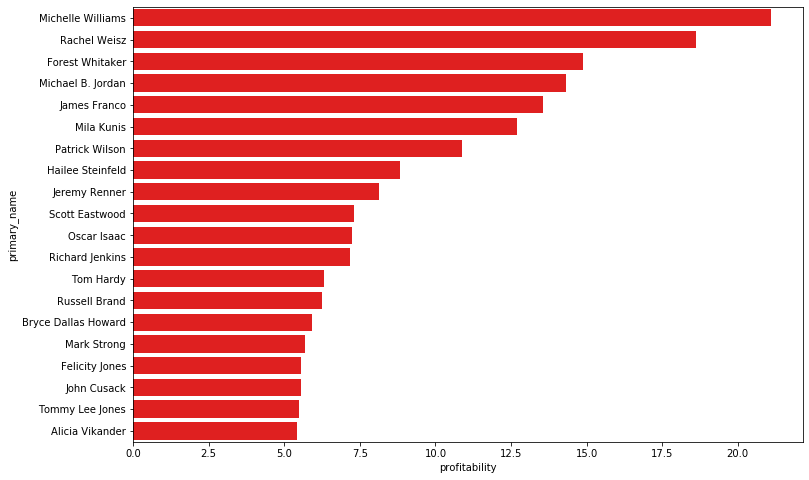

In [39]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y='primary_name', x='profitability', data=top_multi_movie_actors, color='r')